In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
#Get the Data
df = pd.read_csv('D:\Data Analysis TP\FBREF Top5 p90\All stats combined.csv')

In [3]:
#Create a backup dataframe
og = df.copy()

In [4]:
#Reduce the column list to only the relevant features
df = df[['Player','Squad','Pos','Age','90s','PassCmp/90','PrgDistPass/90','LongCmp/90','ProgPass/90',
         'TklW/90','Interceptions/90','Clearances/90','PrgDistCarry/90','AerialsWon','AerialWon%']]

In [5]:
#Filter out only the defenders
df = df[df['Pos'] == 'DF']

In [6]:
#Reset index
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)

In [7]:
df.head()

,Player,Squad,Pos,Age,90s,PassCmp/90,PrgDistPass/90,LongCmp/90,ProgPass/90,TklW/90,Interceptions/90,Clearances/90,PrgDistCarry/90,AerialsWon,AerialWon%
0,Patrick van Aanholt,Crystal Palace,DF,29.0,19.7,45.1,352.5,3.96,5.69,0.96,1.73,2.03,96.8,0.51,47.6
1,Yunis Abdelhamid,Reims,DF,32.0,32.1,46.9,361.9,8.32,2.83,1.43,1.74,5.30,130.5,2.90,65.5
2,Pape Abou Cisse,Saint-Étienne,DF,24.0,14.0,36.1,313.6,9.43,2.21,0.79,2.29,10.10,117.9,4.07,79.2
3,David Abraham,Eint Frankfurt,DF,34.0,13.6,41.5,312.8,7.79,3.16,0.96,1.10,2.43,92.7,2.87,60.0
4,Francesco Acerbi,Lazio,DF,32.0,31.3,57.6,333.6,11.00,3.16,1.21,1.98,5.02,166.3,2.46,74.8


In [8]:
#Scale all the required features, as some may be absolute values and some may be percentages
scaler = StandardScaler()
scaler.fit(df.drop(['Player','Squad','Pos','Age','90s'],axis=1))
scaled_features = scaler.transform(df.drop(['Player','Squad','Pos','Age','90s'],axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[5:])

In [9]:
df_feat.head()

,PassCmp/90,PrgDistPass/90,LongCmp/90,ProgPass/90,TklW/90,Interceptions/90,Clearances/90,PrgDistCarry/90,AerialsWon,AerialWon%
0,0.051562,0.559246,-0.713814,1.253656,-0.138775,0.616621,-0.869884,-0.294885,-1.022825,-0.491366
1,0.172976,0.654115,0.507345,-0.215587,0.536191,0.629964,0.648549,0.328295,0.656495,0.580978
2,-0.555508,0.166651,0.818237,-0.534094,-0.382912,1.363830,2.877441,0.095296,1.478588,1.401711
3,-0.191266,0.158577,0.358902,-0.046059,-0.138775,-0.223989,-0.684143,-0.370702,0.635415,0.251487
4,0.894714,0.368499,1.257966,-0.046059,0.220249,0.950197,0.518530,0.990309,0.347331,1.138118


In [10]:
#Add the player name, squad etc. to these scaled values and create a new DF
new = pd.concat([df.drop(['PassCmp/90', 'PrgDistPass/90','LongCmp/90', 'ProgPass/90', 'TklW/90', 'Interceptions/90',
       'Clearances/90', 'PrgDistCarry/90','AerialsWon','AerialWon%'],axis=1),df_feat],axis=1)

In [11]:
new.head()

,Player,Squad,Pos,Age,90s,PassCmp/90,PrgDistPass/90,LongCmp/90,ProgPass/90,TklW/90,Interceptions/90,Clearances/90,PrgDistCarry/90,AerialsWon,AerialWon%
0,Patrick van Aanholt,Crystal Palace,DF,29.0,19.7,0.051562,0.559246,-0.713814,1.253656,-0.138775,0.616621,-0.869884,-0.294885,-1.022825,-0.491366
1,Yunis Abdelhamid,Reims,DF,32.0,32.1,0.172976,0.654115,0.507345,-0.215587,0.536191,0.629964,0.648549,0.328295,0.656495,0.580978
2,Pape Abou Cisse,Saint-Étienne,DF,24.0,14.0,-0.555508,0.166651,0.818237,-0.534094,-0.382912,1.363830,2.877441,0.095296,1.478588,1.401711
3,David Abraham,Eint Frankfurt,DF,34.0,13.6,-0.191266,0.158577,0.358902,-0.046059,-0.138775,-0.223989,-0.684143,-0.370702,0.635415,0.251487
4,Francesco Acerbi,Lazio,DF,32.0,31.3,0.894714,0.368499,1.257966,-0.046059,0.220249,0.950197,0.518530,0.990309,0.347331,1.138118


In [12]:
#Drop any null value rows
new = new.dropna()

In [13]:
#Get the scaled features
X = np.array(new[['PassCmp/90', 'PrgDistPass/90','LongCmp/90', 'ProgPass/90', 'TklW/90',
                 'Interceptions/90','Clearances/90', 'PrgDistCarry/90','AerialsWon','AerialWon%']])

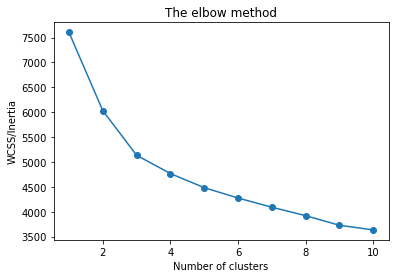

In [14]:
#Use the elbow method to find ideal number of clusters
wcss = [] #within cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.scatter(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS/Inertia') 
plt.show()

In [15]:
#Create a k-means model, fit the features and get cluster predictions. Add the predictions as a column
kmeans = KMeans(n_clusters = 3,random_state=100)
kmeans.fit(X)
new['cluster'] = kmeans.predict(X)

In [16]:
#Resultant dataframe
new.head()

,Player,Squad,Pos,Age,90s,PassCmp/90,PrgDistPass/90,LongCmp/90,ProgPass/90,TklW/90,Interceptions/90,Clearances/90,PrgDistCarry/90,AerialsWon,AerialWon%,cluster
0,Patrick van Aanholt,Crystal Palace,DF,29.0,19.7,0.051562,0.559246,-0.713814,1.253656,-0.138775,0.616621,-0.869884,-0.294885,-1.022825,-0.491366,0
1,Yunis Abdelhamid,Reims,DF,32.0,32.1,0.172976,0.654115,0.507345,-0.215587,0.536191,0.629964,0.648549,0.328295,0.656495,0.580978,1
2,Pape Abou Cisse,Saint-Étienne,DF,24.0,14.0,-0.555508,0.166651,0.818237,-0.534094,-0.382912,1.363830,2.877441,0.095296,1.478588,1.401711,1
3,David Abraham,Eint Frankfurt,DF,34.0,13.6,-0.191266,0.158577,0.358902,-0.046059,-0.138775,-0.223989,-0.684143,-0.370702,0.635415,0.251487,0
4,Francesco Acerbi,Lazio,DF,32.0,31.3,0.894714,0.368499,1.257966,-0.046059,0.220249,0.950197,0.518530,0.990309,0.347331,1.138118,2


In [17]:
#Find the cluster for Jules Kounde (or any other target)
new[new['Player'] == 'Jules Koundé']

,Player,Squad,Pos,Age,90s,PassCmp/90,PrgDistPass/90,LongCmp/90,ProgPass/90,TklW/90,Interceptions/90,Clearances/90,PrgDistCarry/90,AerialsWon,AerialWon%,cluster
456,Jules Koundé,Sevilla,DF,21.0,33.1,1.380369,1.437288,0.538154,0.519035,-0.526522,0.002842,0.151692,1.177078,1.12024,0.479136,2


In [18]:
#Get the cluster number in a variable
kounde_clust = int(new[new['Player'] == 'Jules Koundé']['cluster'])
print(kounde_clust)

2


In [19]:
#Filter out all players with same cluster number as Kounde
df1 = new[new['cluster'] == kounde_clust]
df1.reset_index(inplace=True)
df1.drop(['index'],axis=1,inplace=True)

E:\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [20]:
#Convert Age and 90s columns to int, and filter out data according to your needs.
df1['Age'] = df1['Age'].apply(pd.to_numeric)
df1['90s'] = df1['90s'].apply(pd.to_numeric)
df2 = df1[(df1['Age'] <= 25) & (df1['90s'] >= 20)] #Under the age of 25, minimum 20 90s played in 2020/21 season

<ipython-input-20-803581d498d9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Age'] = df1['Age'].apply(pd.to_numeric)
<ipython-input-20-803581d498d9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['90s'] = df1['90s'].apply(pd.to_numeric)


In [21]:
#Reset index
df2.reset_index(inplace=True)
df2.drop(['index'],axis=1,inplace=True)

In [22]:
#Get the list of player names
l = list(df2['Player'])

In [23]:
#For the names suggested by K-Means get the original features (not the scaled ones) and append to new dataframe

df3 = []
for i in l: #Loop through players suggested by KM model
    for j in range(len(df['Player'])): #Loop through original dataframe
        if i == df['Player'].iloc[j]: #If names match, get the original data
            entry = df.iloc[j]
            df3.append(entry) #Append the original data to a list

In [24]:
df4 = pd.DataFrame(df3) #Create a dataframe out of the list

In [25]:
df4.head()

,Player,Squad,Pos,Age,90s,PassCmp/90,PrgDistPass/90,LongCmp/90,ProgPass/90,TklW/90,Interceptions/90,Clearances/90,PrgDistCarry/90,AerialsWon,AerialWon%
8,Nayef Aguerd,Rennes,DF,24.0,35.0,69.4,515.8,11.50,3.89,1.06,1.11,5.17,154.0,3.66,69.2
14,Manuel Akanji,Dortmund,DF,25.0,26.1,74.7,486.4,12.10,4.90,1.15,1.46,4.06,216.9,1.99,57.8
24,Trent Alexander-Arnold,Liverpool,DF,21.0,33.7,65.8,578.6,12.40,8.25,1.07,1.45,2.11,156.1,0.24,22.2
33,Joachim Andersen,Fulham,DF,24.0,30.3,50.0,394.8,8.57,3.33,0.48,0.00,3.33,140.7,3.89,74.7
34,Joachim Andersen,Lyon,DF,24.0,2.1,50.5,374.6,13.10,3.27,0.86,1.68,7.69,119.5,2.86,100.0


In [26]:
#Store the dataframe as csv
df4.to_csv('D:\\Data Analysis TP\\CB for Spurs new.csv')

In [27]:
#List of players suggested by K-Means model
l

['Nayef Aguerd',
 'Manuel Akanji',
 'Trent Alexander-Arnold',
 'Joachim Andersen',
 'Waldemar Anton',
 'Loïc Bade',
 'Alessandro Bastoni',
 'Sven Botman',
 'Jason Denayer',
 'Rúben Dias',
 'Axel Disasi',
 'Gabriel Dos Santos',
 'Leo Dubois',
 'Jean-Kevin Duverne',
 'Wesley Fofana',
 'Marco Friedl',
 'Marvin Friedrich',
 'Mario Hermoso',
 'Theo Hernández',
 'Rob Holding',
 'Roger Ibanez',
 'Reece James',
 'Marc-Oliver Kempf',
 'Presnel Kimpembe',
 'Jules Koundé',
 'Maxence Lacroix',
 'Clément Lenglet',
 'Philipp Lienhart',
 'Matthijs de Ligt',
 'Lyanco',
 'Gianluca Mancini',
 'Facundo Medina',
 'Benoît Mukinayi',
 'Benjamin Pavard',
 'Stefan Posch',
 'William Saliba',
 'Milan Škriniar',
 'Çağlar Söyüncü',
 'Jonathan Tah',
 'Edmond Tapsoba',
 'Pau Torres',
 'Dayot Upamecano',
 'Adam Webster',
 'Kurt Zouma']